In [1]:
#############################################################################
#David Nichols
#4105 HW 3
#https://github.com/DavidN0809/ECGR-4105/tree/main/Homework%203
#############################################################################

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings("ignore")

In [3]:
def metrics_print(y_pred, y_test):
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

#Prints the matrix
def matrix_print(cnf_matrix):
    
    class_names = [0,1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1) 
    plt.ylabel('Actual label') 
    plt.xlabel('Predicted label')   
    
def create_pca(scled_x, raw_y, columns, n):
    
    pca = PCA(n_components = n)
    principalComponents = pca.fit_transform(scled_x) 
    principalDf = pd.DataFrame(data = principalComponents, columns = columns) 
    
    finalDf = pd.concat([principalDf, raw_y], axis = 1)
    return finalDf
    
    
def logistic_regression(raw_x, raw_y):
    #Splits the data
    x_train, x_test, y_train, y_test = train_test_split(raw_x, breast.target, test_size = 0.20, random_state = 5)
    
    #Creates model for Logistic Regression in terms of the data
    classifier = LogisticRegression()
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)
    metrics_print(y_pred, y_test)
    
    #CONFUSION MATRIX
    matrix = confusion_matrix(y_test, y_pred)
    print("Matrix: \n\n", matrix)
    
    return classifier, matrix


def graph_pca(data):
    fig = plt.figure(figsize = (12,12)) 
    ax = fig.add_subplot(1,1,1)  
    ax.set_xlabel('Principal Component 1', fontsize = 15) 
    ax.set_ylabel('Principal Component 2', fontsize = 15) 
    ax.set_title('2 component PCA', fontsize = 20) 
    targets = ['Malignant','Benign']
    colors = ['r', 'g', 'b'] 
    for target, color in zip(targets,colors): 
        indicesToKeep = pca_y == target 
        ax.scatter(data.loc[indicesToKeep, 'Principal Component 1'], data.loc[indicesToKeep, 'Principal Component 2'], c = color, s = 50) 
    ax.legend(targets) 
    ax.grid()


In [4]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

breast_input = pd.DataFrame(breast_data)
breast_input.head()

breast_labels = breast.target 
breast_labels.shape

breast_labels = np.reshape(breast_labels,(breast_labels.size,1))
final_breast_data = np.concatenate([breast_data,breast_labels],axis=1)
final_breast_data.shape

breast_dataset = pd.DataFrame(final_breast_data)
features_x = breast.feature_names
features_labels = np.append(features_x,'label')
breast_dataset.columns = features_labels
    
breast_dataset['label'].replace(0, 'Benign',inplace=True) 
breast_dataset['label'].replace(1, 'Malignant',inplace=True) 
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [5]:
dataset=breast
model=GaussianNB();
model.fit(dataset.data, dataset.target)
print(model)
model.fit(dataset.data, dataset.target)
print(model)
expected = dataset.target
predicted = model.predict(dataset.data)
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

GaussianNB()
GaussianNB()
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       212
           1       0.94      0.97      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

[[189  23]
 [ 10 347]]


In [6]:
#Explain and elaborate on your results.
#Can you compare your results against the logistic regression classifier you did in previous homework.
#This is better due to the higher or same value of accuracy
#problem 2

In [7]:
raw_x = breast_dataset[features_x]
raw_y = breast_dataset['label']

Accuracy: 0.9736842105263158
Precision: 0.9701492537313433
Recall: 0.9848484848484849
Matrix: 

 [[46  2]
 [ 1 65]]


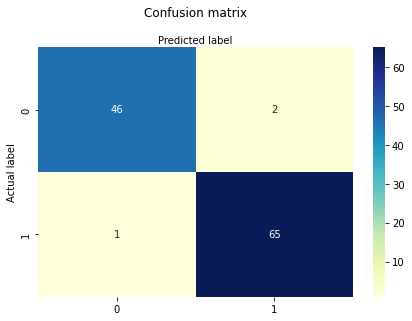

In [8]:
sc_x = StandardScaler()
scled_x = sc_x.fit_transform(raw_x)

nonPCA_classifier, nonPCA_matrix = logistic_regression(scled_x, raw_y)
x_train, x_test, y_train, y_test = train_test_split(raw_x, breast.target, test_size = 0.20, random_state = 12)
    
classifier = LogisticRegression()
classifier.fit(x_train, y_train)    

y_pred = classifier.predict(x_test)

matrix_print(nonPCA_matrix)


In [9]:
columns = ['Principal Component 1', 'Principal Component 2']
pca_data = create_pca(scled_x, raw_y, columns, 3)
pca_data

ValueError: Shape of passed values is (569, 3), indices imply (569, 2)

In [ ]:
pca_x = pca_data[columns]
pca_y = pca_data['label']

graph_pca(pca_data)

: 

In [ ]:
pca_classifier, pca_matrix = logistic_regression(pca_x, pca_y)

: 

In [ ]:
columns = ['1', '2', '3']
pca_data = create_pca(scled_x, raw_y, columns, 3)

pca_x = pca_data[columns]
pca_y = pca_data['label']

pca_classifier, pca_matrix = logistic_regression(pca_x, pca_y)

: 

In [ ]:
columns = ['1', '2', '3', '4', '5','6']
pca_data = create_pca(scled_x, raw_y, columns, 6)

pca_x = pca_data[columns]
pca_y = pca_data['label']

pca_classifier, pca_matrix = logistic_regression(pca_x, pca_y)

: 

In [ ]:
#Explain and elaborate on your results
#As you can see the higher number of K is better due to the higher values
#Problem 3

: 

In [ ]:
NB_classifier = GaussianNB()
NB_classifier.fit(x_train, y_train)

: 

In [ ]:
NB_y_pred = NB_classifier.predict(x_test)
NB_matrix = confusion_matrix (y_test, NB_y_pred)
print("NB_Matrix: \n\n", NB_matrix)

: 

In [ ]:
metrics_print(NB_y_pred, y_test)

: 

In [ ]:
matrix_print(NB_matrix)

: 

In [ ]:
#Compare your results against problem 2
#As you can see the NB is worse due to the lower values 

: 